# Embeddings

In [1]:
# Install gensim - Requires python@3.12
# source ~/pyvenv3.12/bin/activate
! pip install matplotlib gensim scikit-learn

In [2]:
import gensim.downloader
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import random

In [3]:
# 
# Fetches and loads pre-trained GloVe model trained on the Wikipedia + Gigaword corpus, 
# with 50-dimensional vectors.
# Ref: https://github.com/RaRe-Technologies/gensim-data
#
model = gensim.downloader.load("glove-wiki-gigaword-50")

In [4]:
# Each direction in the n-dimensional embedding space encodes a concept
# (meaning).

# To try this out take the embedding of 'woman' subtract it from the
# embedding of 'man' and add the result to 'uncle'. You should get
# something close to 'aunt'. Same would be if you add it to 'son' you
# should probably get something close to 'daughter'.


gender = model ['woman'] - model['man']
gender

array([-0.087144  ,  0.2182    , -0.40985996, -0.03922001, -0.10320008,
        0.94165003, -0.06042001,  0.32988   ,  0.46144   , -0.35962   ,
        0.31102   , -0.86824   ,  0.96006   ,  0.01073003,  0.24337   ,
        0.08193001, -1.02722   , -0.21122   ,  0.695044  , -0.00222   ,
        0.29106003,  0.50530005, -0.099454  ,  0.40445   ,  0.30181003,
        0.1355002 , -0.06060004, -0.07131001, -0.19245   , -0.06115001,
       -0.3204    ,  0.07165   , -0.13337001, -0.25068715, -0.14292999,
       -0.224957  , -0.14899999,  0.048882  ,  0.12191002, -0.27362   ,
       -0.16547601, -0.20426002,  0.54376   , -0.27142498, -0.10244995,
       -0.32108003,  0.2516    , -0.33454996, -0.04371002,  0.01258   ],
      dtype=float32)

In [5]:
aunt = model['uncle'] + gender
aunt

array([ 0.22113599,  0.72757006, -0.43271995, -0.70343006,  0.8524299 ,
        1.37773   , -0.74656   ,  1.0696    , -0.41879   , -0.333256  ,
        0.17927998,  0.71765995,  0.83450997, -0.38975996,  0.98885   ,
       -0.01414299, -1.36834   ,  0.08759999,  0.935434  ,  0.43372   ,
        0.06253003,  0.72099006, -0.236034  ,  0.67634   ,  0.94377005,
       -1.5340998 , -0.58015007, -1.1491101 ,  0.24095   ,  0.07615998,
        0.65703   , -0.19883999, -0.45787   ,  0.21763286,  0.43488002,
        0.286413  , -0.32475   ,  0.260062  ,  0.51246   , -0.16614002,
       -0.21982701,  0.75162995, -0.45247   , -0.40711498,  0.36315006,
       -0.40672302, -0.39044002, -2.20175   , -0.02446802,  0.40081   ],
      dtype=float32)

In [6]:
model.most_similar(aunt)

[('daughter', 0.9085105061531067),
 ('niece', 0.8983901143074036),
 ('grandmother', 0.8875367045402527),
 ('aunt', 0.8853771686553955),
 ('granddaughter', 0.8820971250534058),
 ('mother', 0.8787825703620911),
 ('uncle', 0.85622638463974),
 ('wife', 0.8540744185447693),
 ('cousin', 0.8480611443519592),
 ('widow', 0.842739462852478)]

In [7]:
daughter = model['son'] + gender

In [8]:
model.most_similar(daughter)

[('daughter', 0.9658342003822327),
 ('mother', 0.9153612852096558),
 ('wife', 0.9149919748306274),
 ('son', 0.9038690328598022),
 ('niece', 0.8937416672706604),
 ('father', 0.8929339051246643),
 ('granddaughter', 0.8836506009101868),
 ('married', 0.8753612637519836),
 ('grandmother', 0.8670457601547241),
 ('cousin', 0.8648673295974731)]

In [9]:
# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)

In [10]:
vectors_multidim = np.array([model["man"], model["woman"], model["son"], model["daughter"]])
vectors_multidim

array([[-9.4386e-02,  4.3007e-01, -1.7224e-01, -4.5529e-01,  1.6447e+00,
         4.0335e-01, -3.7263e-01,  2.5071e-01, -1.0588e-01,  1.0778e-01,
        -1.0848e-01,  1.5181e-01, -6.5396e-01,  5.5054e-01,  5.9591e-01,
        -4.6278e-01,  1.1847e-01,  6.4448e-01, -7.0948e-01,  2.3947e-01,
        -8.2905e-01,  1.2720e+00,  3.3021e-02,  2.9350e-01,  3.9110e-01,
        -2.8094e+00, -7.0745e-01,  4.1060e-01,  3.8940e-01, -2.9130e-01,
         2.6124e+00, -3.4576e-01, -1.6832e-01,  2.5154e-01,  3.1216e-01,
         3.1639e-01,  1.2539e-01, -1.2646e-02,  2.2297e-01, -5.6585e-01,
        -8.6264e-02,  6.2549e-01, -5.7600e-02,  2.9375e-01,  6.6005e-01,
        -5.3115e-01, -4.8233e-01, -9.7925e-01,  5.3135e-01, -1.1725e-01],
       [-1.8153e-01,  6.4827e-01, -5.8210e-01, -4.9451e-01,  1.5415e+00,
         1.3450e+00, -4.3305e-01,  5.8059e-01,  3.5556e-01, -2.5184e-01,
         2.0254e-01, -7.1643e-01,  3.0610e-01,  5.6127e-01,  8.3928e-01,
        -3.8085e-01, -9.0875e-01,  4.3326e-01, -1.

In [11]:
vectors_3d  = pca.fit_transform(vectors_multidim)
vectors_3d

array([[ 1.9551128 , -1.2536955 , -0.37707454],
       [ 1.8767699 ,  1.2286208 ,  0.4011418 ],
       [-1.9945672 , -1.2168049 ,  0.38056934],
       [-1.8373142 ,  1.2418792 , -0.404636  ]], dtype=float32)

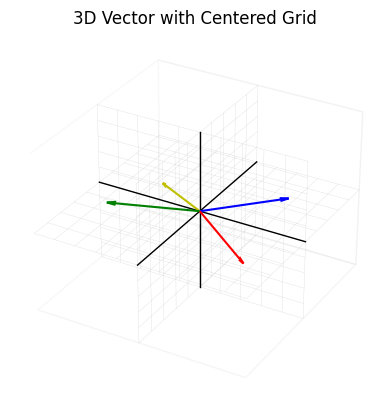

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the vector (example)
origin = np.array([0, 0, 0])
vector1 = np.array(vectors_3d[0])
vector2 = np.array(vectors_3d[1])
vector3 = np.array(vectors_3d[2])
vector4 = np.array(vectors_3d[3])


# Create 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot vector
ax.quiver(*origin, *vector1, color='r', arrow_length_ratio=0.1)
ax.quiver(*origin, *vector2, color='b', arrow_length_ratio=0.1)
ax.quiver(*origin, *vector3, color='g', arrow_length_ratio=0.1)
ax.quiver(*origin, *vector4, color='y', arrow_length_ratio=0.1)

# Set symmetric limits around the origin
limit = 3
ax.set_xlim([-limit, limit])
ax.set_ylim([-limit, limit])
ax.set_zlim([-limit, limit])

# Title
ax.set_title('3D Vector with Centered Grid')

# Draw grid-like reference planes manually (XZ, YZ, XY)
grid_range = np.linspace(-limit, limit, 11)

# Draw XY grid
for x in grid_range:
    ax.plot([x, x], [-limit, limit], [0, 0], color='lightgray', linewidth=0.2)
for y in grid_range:
    ax.plot([-limit, limit], [y, y], [0, 0], color='lightgray', linewidth=0.2)

# Draw XZ grid
for x in grid_range:
    ax.plot([x, x], [0, 0], [-limit, limit], color='lightgray', linewidth=0.2)
for z in grid_range:
    ax.plot([-limit, limit], [0, 0], [z, z], color='lightgray', linewidth=0.2)

# Draw YZ grid
for y in grid_range:
    ax.plot([0, 0], [y, y], [-limit, limit], color='lightgray', linewidth=0.2)
for z in grid_range:
    ax.plot([0, 0], [-limit, limit], [z, z], color='lightgray', linewidth=0.2)

# Draw axis lines manually through origin
ax.plot([-limit, limit], [0, 0], [0, 0], color='black', linewidth=1)  # X
ax.plot([0, 0], [-limit, limit], [0, 0], color='black', linewidth=1)  # Y
ax.plot([0, 0], [0, 0], [-limit, limit], color='black', linewidth=1)  # Z

ax.grid(False)  # Disables grid lines
# Remove ticks and tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Hide pane backgrounds
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Hide pane edge lines (the cube)
ax.xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))

plt.show()

In [13]:
# Get the list of all available words in the model
vocab = list(model.key_to_index.keys())

# Randomly sample 10,000 words
sample_words = random.sample(vocab, 10000)

# Extract their vectors
vectors = [model[word] for word in sample_words]
vectors = np.array(vectors)

In [14]:
# Normalize to unit vectors (row-wise)
norms = np.linalg.norm(vectors, axis=1, keepdims=True)
unit_vectors = vectors / norms

# Compute cosine similarity matrix
cos_sim_matrix = np.dot(unit_vectors, unit_vectors.T)

# Get upper triangle indices without diagonal
i_upper = np.triu_indices_from(cos_sim_matrix, k=1)

# Extract cosine similarities of all unique pairs
cos_sims = cos_sim_matrix[i_upper]

# Clip to avoid numerical issues
cos_sims = np.clip(cos_sims, -1.0, 1.0)

# Convert to angles
angles_rad = np.arccos(cos_sims)
angles_deg = np.degrees(angles_rad)

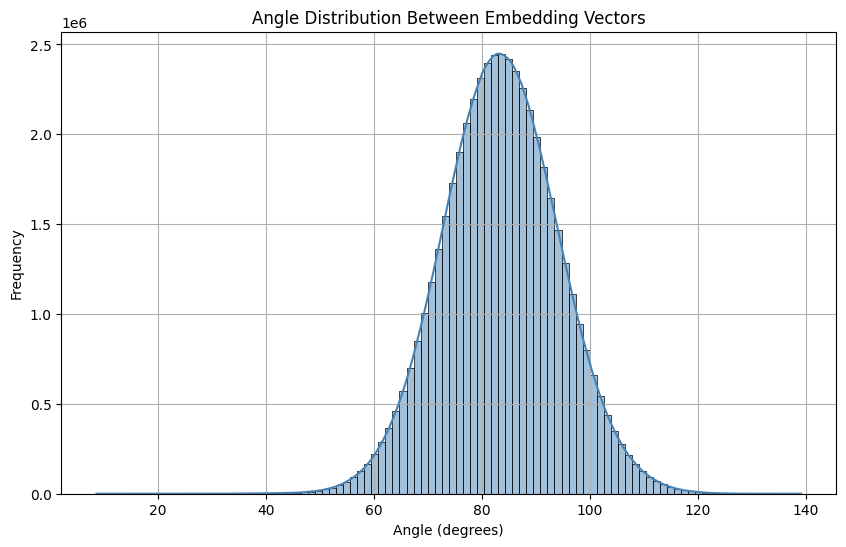

CPU times: user 28.1 s, sys: 4.88 s, total: 33 s
Wall time: 29.4 s


In [15]:
%%time
plt.figure(figsize=(10, 6))
sns.histplot(angles_deg, bins=100, kde=True, color='steelblue')
plt.title("Angle Distribution Between Embedding Vectors")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()